In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("output_strategies.csv")
df.head()

,primary_cases,secondary_cases,total_screens,total_detection,total_healed,strategy,interval_result,seed,C,V,m,k,treatment_prob,isolation_prob,result_length,screen_interval
0,42,118,1178.0,87.0,34.0,NoStrategies,4_2,1000,0.3,1.0,0.9,0.4,0.9,0.01,2,4
1,42,107,1274.0,79.0,35.0,NoStrategies,4_2,1001,0.3,1.0,0.9,0.4,0.9,0.01,2,4
2,42,113,1216.0,96.0,37.0,NoStrategies,4_2,1002,0.3,1.0,0.9,0.4,0.9,0.01,2,4
3,42,89,1220.0,78.0,34.0,NoStrategies,4_2,1003,0.3,1.0,0.9,0.4,0.9,0.01,2,4
4,42,72,1230.0,67.0,32.0,NoStrategies,4_2,1004,0.3,1.0,0.9,0.4,0.9,0.01,2,4


In [6]:
strategies = df["strategy"].unique()

In [8]:
df["ratio_ps"] =  df["secondary_cases"]/df["primary_cases"]
df["ratio_ps"].head()

0    2.809524
1    2.547619
2    2.690476
3    2.119048
4    1.714286
Name: ratio_ps, dtype: float64

<BarContainer object of 4 artists>

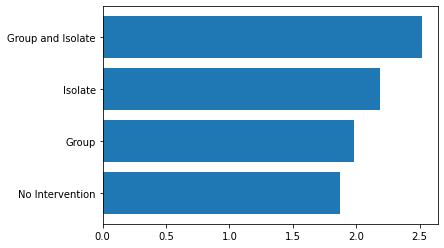

In [23]:
result = df.groupby("strategy")["ratio_ps"].mean().sort_values().values
name=["No Intervention", "Group","Isolate","Group and Isolate"]
plt.barh(y=name, width=result)

In [48]:
new_result = dict()
for strategy in strategies:
    curr = df.loc[df["strategy"] == strategy]["ratio_ps"].values
    new_result.update({strategy: curr})
df_s = pd.DataFrame(new_result)
df_s.sort_values(by="NoStrategies",ascending=False)
    

,NoStrategies,GroupInfectedStrategy,IsolateInfectedStrategy,GroupInfectedStrategy_IsolateInfectedStrategy
92,3.261905,1.976190,2.523810,2.285714
22,3.166667,3.000000,2.285714,2.142857
82,3.166667,2.976190,1.452381,1.952381
33,3.142857,2.071429,1.857143,2.119048
5,3.142857,2.785714,1.904762,1.761905
...,...,...,...,...
84,1.904762,1.833333,1.833333,1.595238
24,1.880952,1.952381,2.071429,1.547619
36,1.785714,1.833333,2.000000,1.857143
4,1.714286,1.880952,1.547619,1.500000
